# SIT742: Modern Data Science 
**(Assessment Task 02: Bank Marketing Data Analytics)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use, change and distribute this package.

Prepared by **SIT742 Teaching Team**


---

**Project Group Information:**

- Names: Ajiz, Avis | Mehmood, Fuqraz | Pandya, Djay
- Student IDs: 214371616 | 219048989 | 218202943
- Emails: aajiz@deakin.edu.au | fmehmood@deakin.edu.au | dmpandya@deakin.edu.au

---

# 1.Import Spark

In [1]:
!pip install wget
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz
!tar xf spark-2.4.0-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.0-bin-hadoop2.7"

  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


Installing the necessary packages:

In [0]:
import findspark
findspark.init()


In [0]:
from pyspark.sql import SparkSession
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext
from pyspark.mllib.stat import Statistics
import matplotlib
import matplotlib.pyplot as plt  # plotting
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
import requests
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import numpy as np  # linear algebra
import os  # accessing directory structure
from pandas.plotting import scatter_matrix
import seaborn as sns

requests.packages.urllib3.disable_warnings()


# 2.Read and check data

In [0]:
import wget
link_to_data = ('https://github.com/tulip-lab/sit742/raw/master/Assessment/'
                + '2019/data/bank.csv'
                )
DataSet = wget.download(link_to_data)


In [5]:
!ls

bank.csv  sample_data  spark-2.4.0-bin-hadoop2.7  spark-2.4.0-bin-hadoop2.7.tgz


In [0]:
# Import the 'bank.csv' as a Spark dataframe and name it as df
spark = SparkSession.builder.appName('ml-bank').getOrCreate()
df = spark.read.csv('bank.csv', header=True, inferSchema=True)


Print the dataframe schema for assurance that the data has been imported correctly

In [7]:
df.printSchema()


root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)



View the first 5 rows of the dataframe to get early insight into the data

In [8]:
df.show(5)


+---+----------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+
|age|       job|marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|deposit|
+---+----------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+
| 59|    admin.|married|secondary|     no|   2343|    yes|  no|unknown|  5|  may|    1042|       1|   -1|       0| unknown|    yes|
| 56|    admin.|married|secondary|     no|     45|     no|  no|unknown|  5|  may|    1467|       1|   -1|       0| unknown|    yes|
| 41|technician|married|secondary|     no|   1270|    yes|  no|unknown|  5|  may|    1389|       1|   -1|       0| unknown|    yes|
| 55|  services|married|secondary|     no|   2476|    yes|  no|unknown|  5|  may|     579|       1|   -1|       0| unknown|    yes|
| 54|    admin.|married| tertiary|     no|    184|     no|  no|unknown|  5| 

The data provided to us is related to the direct marketing campaign of a Portuguese banking institution. The dataset has 17 attributes and 11,162 observations. Of these, 7 attributes are numerical and 10 are categorical

**Data Exploration**

Summary table of *age* and *balance*

In [9]:
# Run summary by age and Balance
df.describe('age', 'balance').show()


+-------+------------------+------------------+
|summary|               age|           balance|
+-------+------------------+------------------+
|  count|             11162|             11162|
|   mean|41.231947679627304|1528.5385235620856|
| stddev|11.913369192215518| 3225.413325946149|
|    min|                18|             -6847|
|    max|                95|             81204|
+-------+------------------+------------------+



The average bank balance is $1528.5. The lowest bank blanace is ($6847),and the highest bank balance is $81,204. The distribution of balance is heavily skewed to the right as a lot of customers have low bank balance and a few have very high bank balance 

Data distribution of *age*, *balance*, and *campaign*

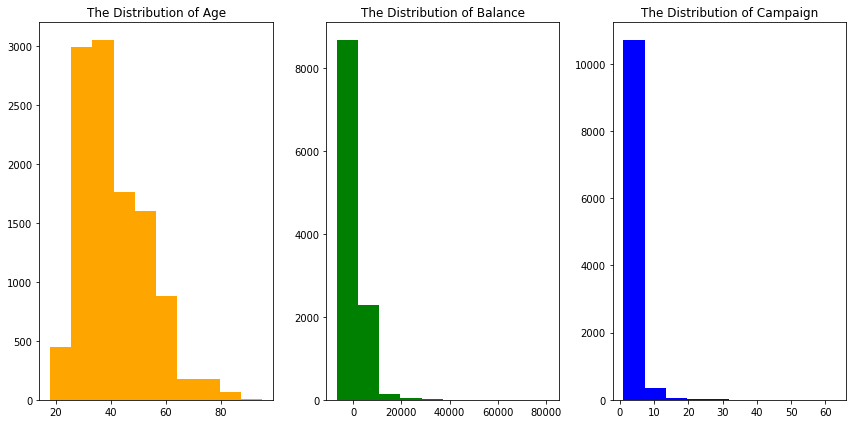

In [10]:
# Look at Distribution of Continuous variable Age, Balance and Campaign
# Generate the figure object and set figure size
dist_c_data = plt.figure(figsize=(12, 6))

# Generate subplots to display data horizontally
H1 = dist_c_data.add_subplot(1, 3, 1)
H2 = dist_c_data.add_subplot(1, 3, 2)
H3 = dist_c_data.add_subplot(1, 3, 3)

# Create distribution for 'age' in column 1
H1.hist(df.toPandas()['age'], color='orange')
H1.set_title('The Distribution of Age')

# Create distribution for 'balance' in column 2
H2.hist(df.toPandas()['balance'], color='green')
H2.set_title('The Distribution of Balance')

# Create distribution for 'campaign' in column 3
H3.hist(df.toPandas()['campaign'], color='blue')
H3.set_title('The Distribution of Campaign')

# Set layout as 'tight'
plt.tight_layout()

# Show the final plot
plt.show()


*Distribution of Age*: The data is approximately normal, with a slight skew to the right. 

*Distribution of Balance*: The data is skewed to the right.

*Distribution of Campaign*: The data is skewed to the right.

The average age of customers is 41 years old. The youngest customers are 18 years old and the oldest are 95 years old. The distribution of age is approximately normal with a slight skew to the right.

Scatter matrix of *age*, *balance*, *duration*, and *campaign*

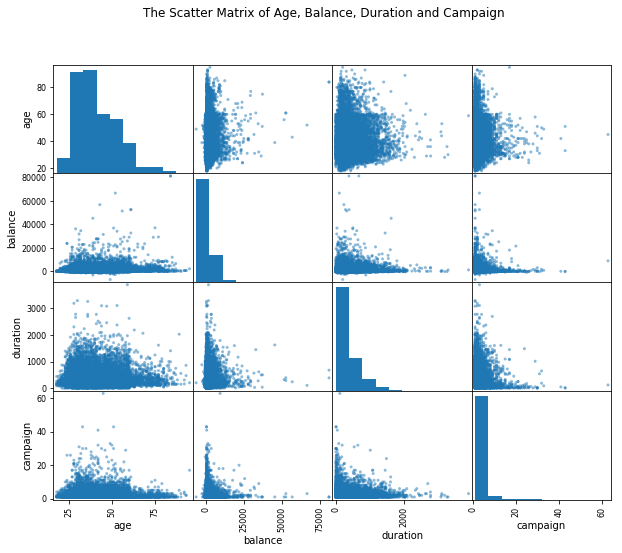

In [11]:
# Scatter Matrix of Age, Balance, Duration and Campaign
from pandas.plotting import scatter_matrix
matrix = scatter_matrix(df.toPandas()[['age', 'balance', 'duration',
                                       'campaign']], figsize=(10, 8))

plt.suptitle('The Scatter Matrix of Age, Balance, Duration and Campaign')
plt.show()


The scatterplot matrix shows that age and balance have high variability. Some middle-aged customers have very high bank balances, perhaps because they are more successful in their respective careers. People over sixty appear to have lower bank balances, perhaps due to lower income or retirement

Aggregation Table

In [12]:
# Age group by count
countsByAge = df.groupBy("age").count()
countsByAge.orderBy("age").show(countsByAge.count(), False)


+---+-----+
|age|count|
+---+-----+
|18 |8    |
|19 |13   |
|20 |20   |
|21 |30   |
|22 |48   |
|23 |68   |
|24 |95   |
|25 |168  |
|26 |235  |
|27 |246  |
|28 |292  |
|29 |328  |
|30 |456  |
|31 |496  |
|32 |477  |
|33 |464  |
|34 |466  |
|35 |461  |
|36 |432  |
|37 |370  |
|38 |353  |
|39 |343  |
|40 |326  |
|41 |299  |
|42 |295  |
|43 |249  |
|44 |238  |
|45 |253  |
|46 |258  |
|47 |255  |
|48 |214  |
|49 |241  |
|50 |194  |
|51 |194  |
|52 |205  |
|53 |204  |
|54 |187  |
|55 |197  |
|56 |177  |
|57 |184  |
|58 |159  |
|59 |184  |
|60 |169  |
|61 |66   |
|62 |45   |
|63 |38   |
|64 |37   |
|65 |27   |
|66 |29   |
|67 |29   |
|68 |24   |
|69 |20   |
|70 |23   |
|71 |27   |
|72 |28   |
|73 |29   |
|74 |18   |
|75 |18   |
|76 |21   |
|77 |31   |
|78 |19   |
|79 |10   |
|80 |17   |
|81 |9    |
|82 |10   |
|83 |7    |
|84 |5    |
|85 |5    |
|86 |5    |
|87 |4    |
|88 |2    |
|89 |1    |
|90 |2    |
|92 |2    |
|93 |2    |
|95 |1    |
+---+-----+



Distributions of Categorial attributes

In [0]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    # For displaying purposes, pick columns that
    # have between 1 and 50 unique values
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol+nGraphPerRow-1) / nGraphPerRow
    plt.figure(num=None, figsize=(6*nGraphPerRow, 6*nGraphRow),
               dpi=50, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]}(column{i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()


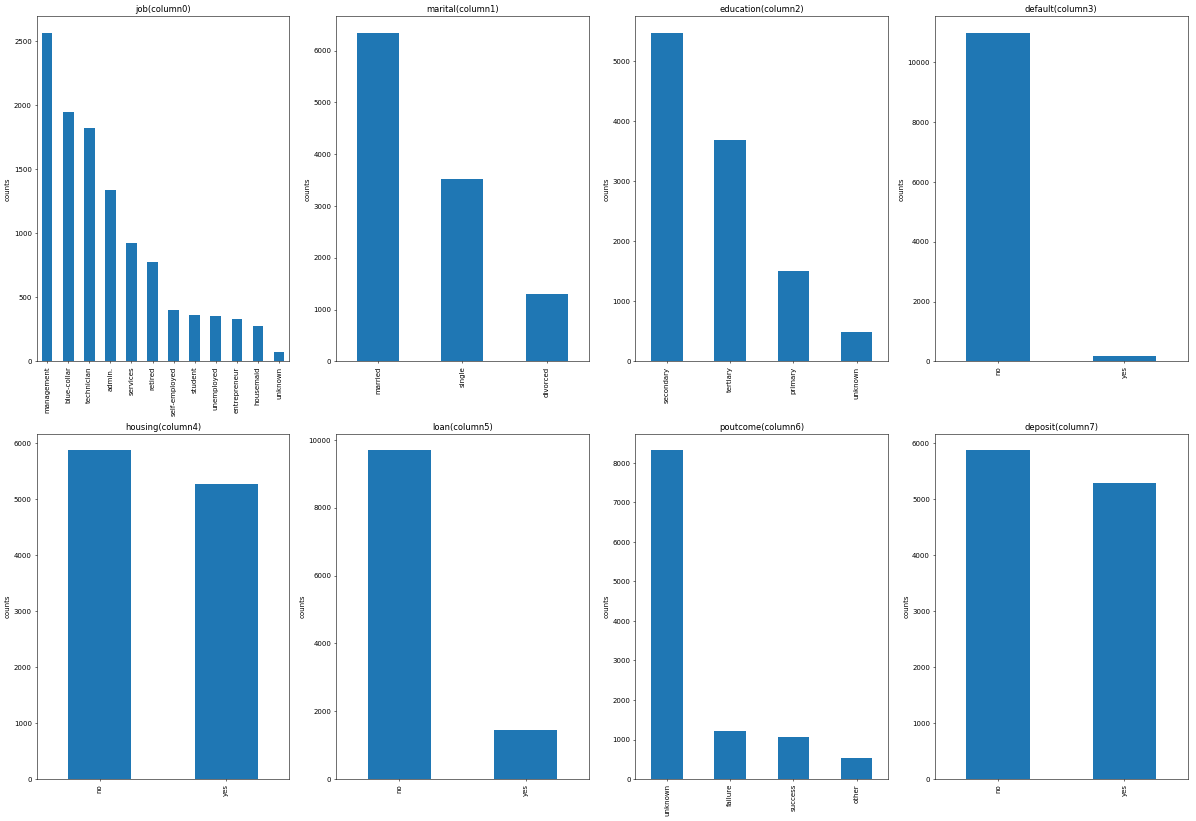

In [14]:
# Look at Distribution of Categorical variables Job, Marital, Education,
# default, Housing, Poutcome and Deposit
plotPerColumnDistribution(df.toPandas()[["job", "marital", "education",
                                         "default", "housing", "loan",
                                         "poutcome", "deposit"]], 10, 4)


Mode of *job*: Management   
Mode of *marital*: Married   
Mode of *education*: Secondary   
Mode of *default*: No   
Mode of *housing*: No  
Mode of *loan*: No   
Mode of *poutcome*: Unknown   
Mode of *deposit*: No
 
Most of the institutions callers are between 30 and 50 years old. They have bank balances less than $10,000. They have received between 0 and 5 calls during the current campaign. They are married individuals who work in management and have acquired Secondary education. They also don’t have any loans

Distribution of Target (Label)

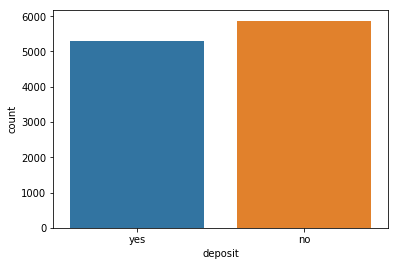

In [15]:
# Plot target

sns.countplot(df.toPandas()["deposit"])
plt.show()


Visualising categorial variable split between the two label categories

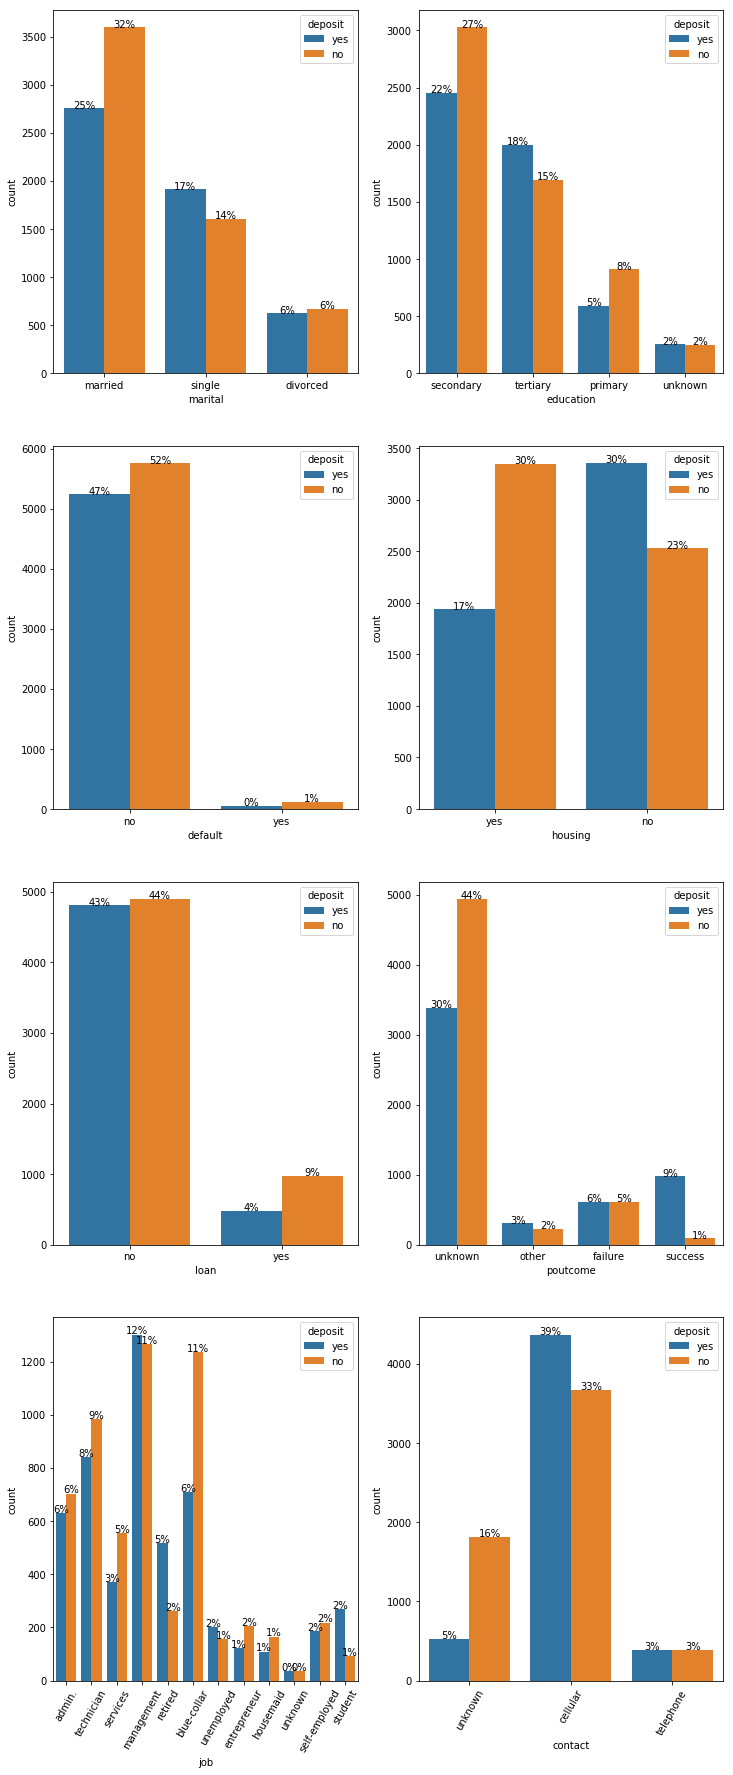

In [16]:
# Plot catagorical variables split by target
total_records = len(df.toPandas())
columns = ["marital", "education", "default", "housing",
           "loan", "poutcome", "job", "contact"]

# Initiate the figure layout
plt.figure(figsize=(12, 8))
j = 0

# Loop through and plot each column
for i in columns:
    j += 1
    plt.subplot(4, 2, j)
    ax1 = sns.countplot(data=df.toPandas(), x=i, hue="deposit")
    if(j == 7 or j == 8):
        plt.xticks(rotation=60)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                 height + 3,
                 '{:1.0%}'.format(round((height/total_records)*1, 2), 0),
                 ha="center", rotation=0)

# Customise the subplot layout
plt.subplots_adjust(bottom=-0.9, top=2)
plt.show()


# 3.Select features

In [0]:
# Select features ('age', 'job', 'marital', 'education', 'default', 'balance',
# 'housing', 'loan', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit')
# as df2
df2 = df.select('age', 'job', 'marital', 'education', 'default', 'balance',
                'housing', 'loan', 'campaign', 'pdays', 'previous',
                'poutcome', 'deposit')


We retain 13 important attributes. Of these, 12 are predictors and the deposit variable is the label (Please see Appendix C). Therefore, our models will use the 12 predictors to predict whether customers will subscribe to a term deposit (Deposit = ‘Yes’).

In [0]:
# Remove invalid rows/records using spark.sql
for idx, val in enumerate(df2.columns):
    if df2.dtypes[idx][1] == 'string':
        df2 = df2.filter((df2[val] != "unknown") & (df2[val] != "other"))


We removed invalid rows contained ‘unknown’ or ‘other’ for the categorical attributes. For assurance, we also ensured that there were no null values in the dataframe

In [0]:
# Store list of column names for later use
cols = df2.columns


In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import (OneHotEncoderEstimator,
                                StringIndexer, VectorAssembler)

# Create list of columns with categorical values
categoricalColumns = ["job", "marital", "education",
                      "default", "housing", "loan", "poutcome"]

# Initiate empty list to store stages for Pipeline
stages = []

# Loop through the list of Categorical columns and create Pipeline stages
for categoricalCol in categoricalColumns:
    # Category Indexing with StringIndexer
    stringIndexer = StringIndexer(inputCol=categoricalCol,
                                  outputCol=categoricalCol + "Index")
    # Use OneHotEncoder to convert categorical
    # variables into binary SparseVectors
    encoder = OneHotEncoderEstimator(inputCols=[stringIndexer.getOutputCol()],
                                     outputCols=[categoricalCol + "classVec"])
    # Add stages.  These are not run here, but will run all at once later on.
    stages += [stringIndexer, encoder]


In [0]:
# Convert label into label indices using the StringIndexer
label = StringIndexer(inputCol="deposit", outputCol="label")

# Add label String Indexer to Pipeline stages
stages += [label]


In [0]:
# Transform all features into a vector using VectorAssembler

# Create list of numeric columns
numericCols = ["age", "balance", "campaign", "pdays", "previous"]

# Create composite list of columns to assemble into vector
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols

# Create vector assembler object to add to Pipeline
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")

# Add vector assembler to Pipeline
stages += [assembler]


In [0]:
# Run the Pipeline to create the dataframe for analysis

# Set pipeline stages using the list of stages
partialPipeline = Pipeline().setStages(stages)

# Fit the pipeline model to our dataframe
pipelineModel = partialPipeline.fit(df2)

# Transform our dataframe using the Pipeline model 
preppedDataDF = pipelineModel.transform(df2)


we used StringIndexer and OneHotEncoder to create binary spare vectors for the categorical attributes. We then assembled the predictor columns into a single column of features

## 3.1 normalisation

In [24]:
# Apply Min-Max normalisation on each attribute using MinMaxScaler
from pyspark.ml.feature import MinMaxScaler

# Create min-max scaler to apply to dataframe
minMax = MinMaxScaler(inputCol=("features"),
                      outputCol="normfeatures")

# Apply min-max scaler to dataframe
normdf = minMax.fit(preppedDataDF).transform(preppedDataDF)

# Show the results of min-max scaling
normdf.select("features", "normfeatures").show(5)


+--------------------+--------------------+
|            features|        normfeatures|
+--------------------+--------------------+
|(23,[5,10,12,14,1...|[0.0,0.0,0.0,0.0,...|
|(23,[1,10,12,14,1...|[0.0,1.0,0.0,0.0,...|
|(23,[2,10,13,14,1...|[0.0,0.0,1.0,0.0,...|
|(23,[4,10,13,14,1...|[0.0,0.0,0.0,0.0,...|
|(23,[1,10,12,14,1...|[0.0,1.0,0.0,0.0,...|
+--------------------+--------------------+
only showing top 5 rows



We have normalized the features using min-max transformation

In [25]:
# Create a clean set for analysis

# Create list of relevant columns
selectedcols = ["label", "features", "normfeatures"] + cols

# Only select the relevant columns
df2 = normdf.select(selectedcols)

# Display the clean dataframe
display(df2)


DataFrame[label: double, features: vector, normfeatures: vector, age: int, job: string, marital: string, education: string, default: string, balance: int, housing: string, loan: string, campaign: int, pdays: int, previous: int, poutcome: string, deposit: string]

## 3.2 (Extension) Correlation Heat Map

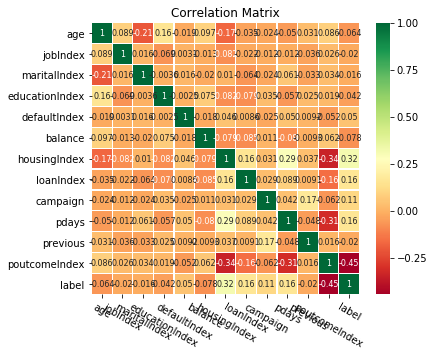

In [26]:
from pandas.plotting import scatter_matrix
import seaborn as sns

# Convert dataframe to Pandas for visualization and select necessary columns
corr_data = normdf.toPandas()[["age", "jobIndex", "maritalIndex",
                               "educationIndex", "defaultIndex", "balance",
                               "housingIndex",  "loanIndex", "campaign",
                               "pdays", "previous", "poutcomeIndex", "label"]]

# Create data correlation matrix
corr = corr_data.corr()

# Visualize matrix using Seaborn
cor_plot = sns.heatmap(corr, annot=True, cmap='RdYlGn',
                       linewidths=0.2, annot_kws={'size': 8})
fig = plt.gcf()
fig.set_size_inches(6, 5)
plt.xticks(fontsize=10, rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()


Only the *housingIndex* seems to have significant correlation with the *label*

# 4.Unsupervised learning

For clarity, we are defining the "training" and "testing" sets (they are the same - our training data is also our testing data)

In [27]:
# Create a temporary view that is not cached to memory
df2.createOrReplaceTempView("bank3")

# Use the temporary view to create training data
train = spark.sql("SELECT * FROM bank3")

# Use the temporary view to create testing data (same as training data)
test = spark.sql("SELECT * FROM bank3")

# Show the schema for validation that the code is working
train.printSchema()


root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- normfeatures: vector (nullable = true)
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)



## 4.1 K-means

In [28]:
# Perform unsupervised learning on df2 with k-means
# You can use whole df2 as both training and testing data,
# Evaluate the clustering result using Accuracy.
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Create KMeans model with k=2
# k = 2 because we have two categories in our target variable
kmeans = KMeans(
    featuresCol="normfeatures",
    predictionCol="prediction",
    k=2,
    seed=0)

# Fit the model to the training data
kmeans_model = kmeans.fit(train)

# Make predictions for the testing data using the trained model
kmeans_prediction = kmeans_model.transform(test)

# Compute the Within Set Sum of Squared Errors
wssse = kmeans_model.computeCost(df2)

# Print the Within Set Sum of Squared Errors
print("Within Set Sum of Squared Errors = " + str(wssse))


Within Set Sum of Squared Errors = 4231.882784581968


Examining the count splits between the two categories predicted by our KMeans model

In [29]:
(kmeans_prediction.
 groupBy("prediction").
 count().
 orderBy("prediction").
 show())


+----------+-----+
|prediction|count|
+----------+-----+
|         0|  891|
|         1| 1290|
+----------+-----+



Compute KMeans model accuracy using Multi-class Classification Evaluator

In [30]:
# Evaluate model using MulticlassClassificationEvaluator

# Change the prediction column to Double value type
kmeans_prediction.createOrReplaceTempView("bank4")
prediction = spark.sql("SELECT features, normfeatures, label, age, job,"
                       + "marital, education, default, balance, housing, loan,"
                       + "campaign, pdays, previous, poutcome, deposit,"
                       + "CAST(prediction as Double) AS prediction FROM bank4")
# Initiate Multi-class Classification Evaluator
kmeans_mc = MulticlassClassificationEvaluator(predictionCol='prediction',
                                              labelCol='label',
                                              metricName='accuracy')

# Apply the evaluator to the predicted data
kmeans_maccuracy = kmeans_mc.evaluate(prediction)

# Print the evaluation results
print("KMeans Multi-class Evaluation Accuracy = " + str(kmeans_maccuracy))


KMeans Multi-class Evaluation Accuracy = 0.5199449793672627


Compute KMeans model accuracy using Binary Classification Evaluator

In [31]:
# Evaluate model using BinaryClassificationEvaluator

# Initiate Binary Classification Evaluator
kmeans_mc = BinaryClassificationEvaluator(rawPredictionCol="prediction")

# Apply the evaluator to the predicted data
kmeans_baccuracy = kmeans_mc.evaluate(prediction)

# Print the evaluation results
print("KMeans Binary Evaluation Accuracy = " + str(kmeans_baccuracy))


KMeans Binary Evaluation Accuracy = 0.5638032700587698


The model accuracies are 51% and 56% for multiclass and binary evaluation respectively. Either way the model is only predicting about roughly half the values correctly. Essentially this is the same as flipping a coin and these accuracies would not justify model deployment

## 4.2 PCA

In [32]:
# Generate a scatter plot using the first two PCA components to investigate the
# data distribution.
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors

# Create PCA model with k=2
# k = 2 is used because we want two principal components
pca = PCA(k=2,
          inputCol="normfeatures",
          outputCol="pcaFeatures")

# Fit the model to the training data
pca_model = pca.fit(train)

# Make predictions for the testing data using the trained model
pca_prediction = pca_model.transform(test)

# Print the explained variance ratio for each component
print('Explained Variance Ratio', pca_model.explainedVariance.toArray())

# Display the essential columns of the predicted dataframe
pca_prediction.select("features", "normfeatures", "pcaFeatures").show(5)


Explained Variance Ratio [0.24018136 0.17260419]
+--------------------+--------------------+--------------------+
|            features|        normfeatures|         pcaFeatures|
+--------------------+--------------------+--------------------+
|(23,[5,10,12,14,1...|[0.0,0.0,0.0,0.0,...|[0.96364248505160...|
|(23,[1,10,12,14,1...|[0.0,1.0,0.0,0.0,...|[0.83734101836268...|
|(23,[2,10,13,14,1...|[0.0,0.0,1.0,0.0,...|[-0.1084500265257...|
|(23,[4,10,13,14,1...|[0.0,0.0,0.0,0.0,...|[-0.4795609426700...|
|(23,[1,10,12,14,1...|[0.0,1.0,0.0,0.0,...|[0.95767948650617...|
+--------------------+--------------------+--------------------+
only showing top 5 rows



In [0]:
# Create the X and y values for PCA plot

y = pca_prediction.rdd.map(lambda row: row.label).collect()
X_pca = pca_prediction.rdd.map(lambda row: row.pcaFeatures).collect()
X_pca = np.array(X_pca)


In [0]:
# Define custom function to plot the PCA data

# Change default style figure and font size
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] = 12


def plot_pca(X_pca, y):
    """a scatter plot of the 2-dimensional data"""
    markers = '*', 'x', 'o'
    colors = list(plt.rcParams['axes.prop_cycle'])
    target = np.unique(y)
    for idx, (t, m) in enumerate(zip(target, markers)):
        subset = X_pca[y == t]
        plt.scatter(subset[:, 0], subset[:, 1], s=50,
                    c=colors[idx]['color'], label=t, marker=m)

    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend(loc='lower left')
    plt.tight_layout()
    plt.show()


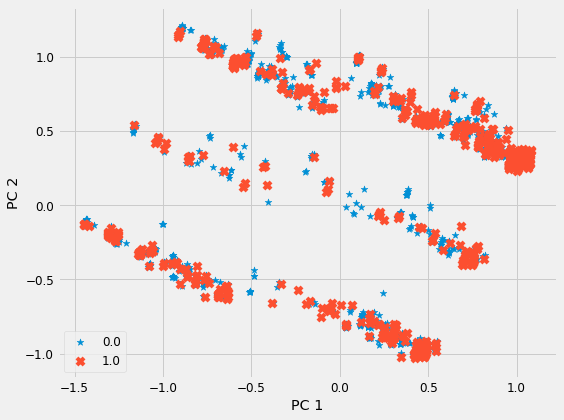

In [35]:
# Plot the data using the custom function defined in the previous cell

plot_pca(X_pca, y)


The red crosses represent Deposit = ‘No’ and the blue stars represent Deposit = ‘Yes’. As the plot indicates, there are more customers predicted to be saying ‘No’ compared to ‘Yes’. This shows that the model is not very accurate because in the wrangled and processed data, there are more customers who said ‘Yes’ compared to ‘No’ (unbalanced dataset)

# 5.Supervised learning

In [36]:
train, test = df2.randomSplit([0.7, 0.3], seed=742)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))


Training Dataset Count: 1535
Test Dataset Count: 646


## 5.1 LogisticRegression

In [37]:
# Logistic Regression
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Create logistic regression model
lr = LogisticRegression(labelCol="label",
                        featuresCol="normfeatures",
                        maxIter=10)

# Train the model using our training data
lr_model = lr.fit(train)

# Create Multi-class Classification Evaluator
mc_lr_evaluator = MulticlassClassificationEvaluator(labelCol="label",
                                                    predictionCol="prediction",
                                                    metricName="accuracy")

# Create Binary Classification Evaluator
bc_lr_evaluator = BinaryClassificationEvaluator(
    rawPredictionCol="rawPrediction")

# Predict 'deposit' values for the testing data
# using our Logistic Regression model
lr_predictions = lr_model.transform(test)

# Compute model accuracies using the evaluators created above
mc_lr_accuracy = mc_lr_evaluator.evaluate(lr_predictions)
bc_lr_accuracy = bc_lr_evaluator.evaluate(lr_predictions)

# Print the model accuracies
print("LR Multi-class Evaluation Accuracy = " + str(mc_lr_accuracy))
print("LR Binary Evaluation Accuracy = " + str(bc_lr_accuracy))


LR Multi-class Evaluation Accuracy = 0.7368421052631579
LR Binary Evaluation Accuracy = 0.7840909090909086


In [38]:
# Confusion Matrix

# Create true-positive, false-positive,
# true-negative, and false-negative values
tp = float(lr_predictions.filter("prediction == 1.0 AND label == 1").count())
fp = float(lr_predictions.filter("prediction == 1.0 AND label == 0").count())
tn = float(lr_predictions.filter("prediction == 0.0 AND label == 0").count())
fn = float(lr_predictions.filter("prediction == 0.0 AND label == 1").count())

# Create dataframe of metrics created above
metrics = spark.createDataFrame([
 ("TP", tp),
 ("FP", fp),
 ("TN", tn),
 ("FN", fn),
 ("Precision", tp / (tp + fp)),
 ("Recall", tp / (tp + fn))], ["metric", "value"])
metrics.show()


+---------+------------------+
|   metric|             value|
+---------+------------------+
|       TP|              98.0|
|       FP|              70.0|
|       TN|             378.0|
|       FN|             100.0|
|Precision|0.5833333333333334|
|   Recall| 0.494949494949495|
+---------+------------------+



Logistic Regression accuracies are 74% and 78% for multiclass and binary evaluation respectively. The Precision and Recall rates are 58% and 49% respectively. This model performs reasonably well at predicting overall Deposit values, however the low precision and recall values indicate that the model might only be predicting with high accuracy because of the imbalanced data

In [39]:
# Examine the coefficients

# Print the coefficients and intercept for logistic regression
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))


Coefficients: [-0.08139824141388131,0.20413704451291032,-0.006341395114845759,0.3736052382169719,-0.37830410194108127,0.1603415670416509,-0.7776576445423331,-1.1300582072294127,0.09552661685029476,1.0417155166194834,-0.06103851344138119,-0.187921210835653,0.17016443183705296,-0.3773792803004142,-0.6864867091669322,-0.6468343086986477,-0.2620318703009812,2.1844297037204767,0.10510549022591019,-2.706938881938558,2.292203532294139,-0.7105154961847511,-1.9947733802318928]
Intercept: -0.7897829111303085


In [40]:
# Important features which affect the objective (‘yes’ in ‘deposit’)
colmn = normdf.select('age', 'job', 'marital', 'education', 'default',
                      'balance', 'housing', 'loan', 'campaign', 'pdays',
                      'previous', 'poutcome', 'deposit', 'jobIndex',
                      'maritalIndex', 'educationIndex', 'defaultIndex',
                      'housingIndex', 'loanIndex', 'poutcomeIndex', 'label',
                      'features', 'normfeatures').columns


# Rename _1, _2 ... columns to their original name
weights = np.array(lr_model.coefficients)
weights_df = pd.DataFrame(weights)
weights_df["normfeatures"] = pd.Series(colmn)
weights_df


,0,normfeatures
0,-0.081398,age
1,0.204137,job
2,-0.006341,marital
3,0.373605,education
4,-0.378304,default
5,0.160342,balance
6,-0.777658,housing
7,-1.130058,loan
8,0.095527,campaign
9,1.041716,pdays


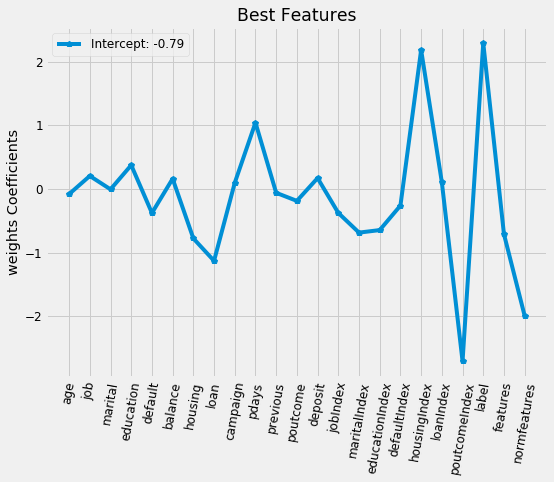

In [41]:
# Plot coefficients to visualise the best features
plt.plot(weights_df['normfeatures'],weights_df[0],'-p', 
         label=("Intercept: "+ str(round(lr_model.intercept,2)))
        )
plt.xticks( rotation=80)
plt.ylabel('weights Coefficients')
plt.legend(loc='best')
plt.title('Best Features')
plt.show()

The three most important features in this model are housingIndex, pdays, and education. This is because these features have the highest value for the logistic regression coefficients. Taking the exponential value of each coefficient provides the likelihood (probability) that the variable affects Deposit. Positive coefficient values are inherently better than negative values because their exponential is always greater than 1. This means that they always have greater than 0% likelihood of affecting Deposit

## 5.2 Decision tree

In [42]:
# Decision tree
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Create Decision Tree Model
dt = DecisionTreeClassifier(labelCol="label",
                            featuresCol="normfeatures")

# Train the model using our training data
dt_model = dt.fit(train)

# Create Binary Classification Evaluator
bc_dt_evaluator = BinaryClassificationEvaluator(
    rawPredictionCol="rawPrediction")

# Predict 'deposit' values for the testing data
# using our Logistic Regression model
dt_predictions = dt_model.transform(test)

# Compute model accuracy using the evaluators created above
bc_dt_accuracy = bc_lr_evaluator.evaluate(dt_predictions)

# Print the model accuracy
print("DT Binary Evaluation Accuracy = " + str(bc_dt_accuracy))


DT Binary Evaluation Accuracy = 0.7864132395382394


In [43]:
# View model nodes and tree depth

print("numNodes = ", dt_model.numNodes)
print("depth = ", dt_model.depth)


numNodes =  39
depth =  5


In [44]:
# View model's predictions and probabilities of each prediction class

selected = dt_predictions.select("label", "prediction",
                                 "probability", "age", "balance")
selected.show(5)


+-----+----------+--------------------+---+-------+
|label|prediction|         probability|age|balance|
+-----+----------+--------------------+---+-------+
|  0.0|       0.0|[0.58219178082191...| 29|    231|
|  0.0|       0.0|[0.58219178082191...| 52|    335|
|  0.0|       0.0|[0.94940476190476...| 48|   2892|
|  0.0|       1.0|[0.32843137254901...| 33|   3935|
|  0.0|       1.0|[0.32843137254901...| 48|   4415|
+-----+----------+--------------------+---+-------+
only showing top 5 rows



The Binary evaluation accuracy for Decision Tree model is 79%. This seems to be the best model

## 5.3 NaiveBayes

In [45]:
# Naive Bayes
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Create Naive Bayes Model
nb = NaiveBayes(smoothing=1.0,
                modelType="multinomial",
                labelCol="label",
                featuresCol="normfeatures")

# Train the model using our training data
nb_model = nb.fit(train)

# Create Multi-class Classification Evaluator
mc_nb_evaluator = MulticlassClassificationEvaluator(labelCol="label",
                                                    predictionCol="prediction",
                                                    metricName="accuracy")

# Predict 'deposit' values for the testing data
# using our Logistic Regression model
nb_predictions = nb_model.transform(test)

# Compute model accuracies using the evaluators created above
mc_nb_accuracy = mc_nb_evaluator.evaluate(nb_predictions)

# Print the model accuracies
print("DT Multi-class Evaluation Accuracy = " + str(mc_nb_accuracy))


DT Multi-class Evaluation Accuracy = 0.7291021671826625


The multiclass evaluation accuracy for NaïveBayes is 73%. This is low compared to Logistic Regression and Decision Tree

In [46]:
# Choose the best model based on evaluators
BestScore = spark.createDataFrame([("KNN_M", str(kmeans_maccuracy)),
                                   ("KNN_B", str(kmeans_baccuracy)),
                                   ("LR_M", str(mc_lr_accuracy)),
                                   ("LR_B", str(bc_lr_accuracy)),
                                   ("DT_B", str(bc_dt_accuracy)),
                                   ("NB_M", str(mc_nb_accuracy))],
                                   ["Model", "Score"])
BestScore.printSchema()


root
 |-- Model: string (nullable = true)
 |-- Score: string (nullable = true)



In [47]:
# View the scores dataframe

BestScore.orderBy("Score").show()


+-----+------------------+
|Model|             Score|
+-----+------------------+
|KNN_M|0.5199449793672627|
|KNN_B|0.5638032700587698|
| NB_M|0.7291021671826625|
| LR_M|0.7368421052631579|
| LR_B|0.7840909090909086|
| DT_B|0.7864132395382394|
+-----+------------------+



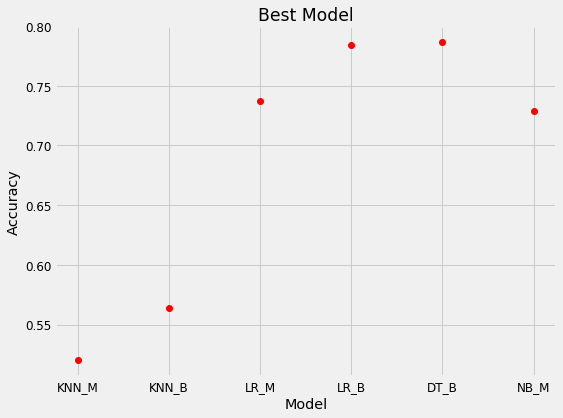

In [48]:
# Plot the model scores

plt.plot(["KNN_M", "KNN_B", "LR_M", "LR_B", "DT_B", "NB_M"],
         BestScore.toPandas()[['Score']].apply(pd.to_numeric), 'ro')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Best Model')
plt.show()


Overall, Supervised Learning models performed much better on this dataset compared to Unsupervised learning models. Based on the Binary Classification Evaluator, Decision Tree is the best model with accuracy of 79%